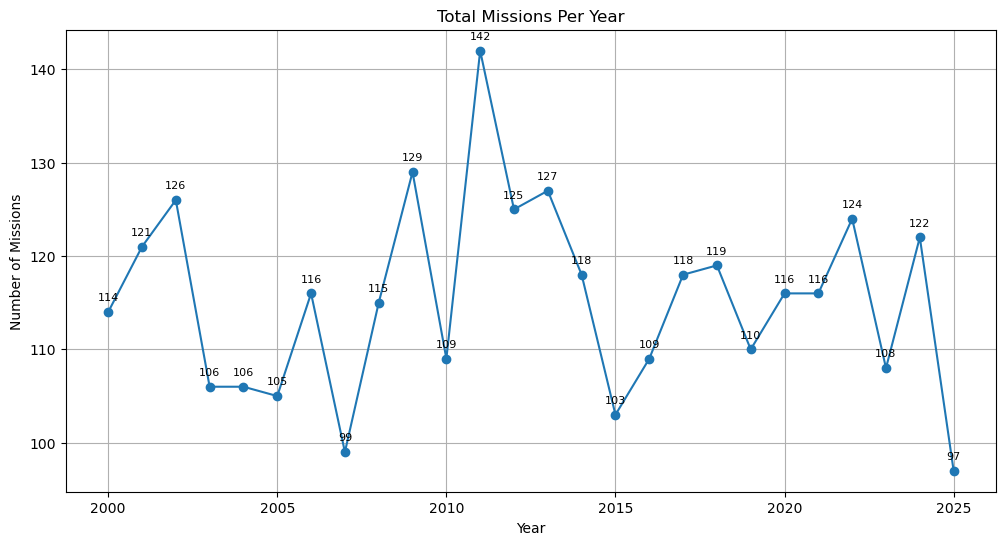

In [7]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt
import squarify

# Declaration
# Exploratory Data Analysis (EDA) - Line Chart Total Mission per Year
data = pd.read_csv("Global_Space_Exploration_Dataset.csv", encoding="ISO-8859-1")

if 'Year' not in data.columns:
    if 'Date' in data.columns:
        data['Year'] = pd.to_datetime(data['Date'], errors='coerce').dt.year
    else:
        raise ValueError("No 'Year' or 'Date' column found in the dataset")

# Group by year and count the number of missions
missions_per_year = data['Year'].value_counts().sort_index()

# Plot Line Chart
plt.figure(figsize=(12, 6))
plt.plot(missions_per_year.index, missions_per_year.values, marker='o')
plt.title('Total Missions Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Missions')
plt.grid(True)

# Add Label
for x, y in zip(missions_per_year.index, missions_per_year.values):
    plt.text(x, y + 1, str(y), ha='center', va='bottom', fontsize=8)
    
plt.show()

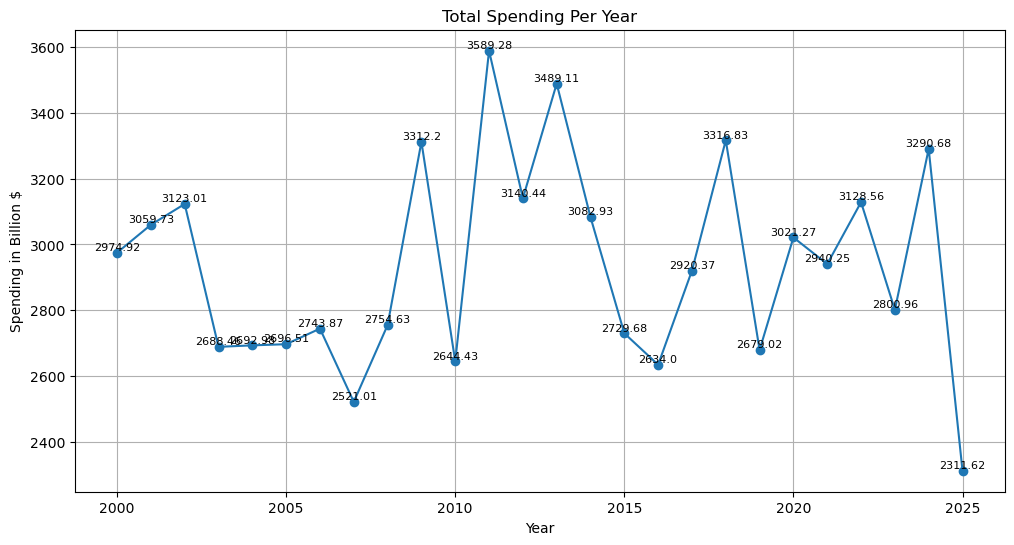

In [11]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt
import squarify

# Declaration
# Exploratory Data Analysis (EDA) - Line Chart Total Spending per Year
data = pd.read_csv("Global_Space_Exploration_Dataset.csv", encoding="ISO-8859-1")

if 'Year' not in data.columns:
    if 'Date' in data.columns:
        data['Year'] = pd.to_datetime(data['Date'], errors='coerce').dt.year
    else:
        raise ValueError("No 'Year' or 'Date' column found in the dataset")

# Group by year and count the number of missions
spending_per_year = data.groupby('Year')['Budget (in Billion $)'].sum().sort_index()

# Plot Line Chart
plt.figure(figsize=(12, 6))
plt.plot(spending_per_year.index, spending_per_year.values, marker='o')
plt.title('Total Spending Per Year')
plt.xlabel('Year')
plt.ylabel('Spending in Billion $')
plt.grid(True)

# Add Label
for x, y in zip(spending_per_year.index, spending_per_year.values):
    plt.text(x, y + 1, str(y), ha='center', va='bottom', fontsize=8)
    
plt.show()

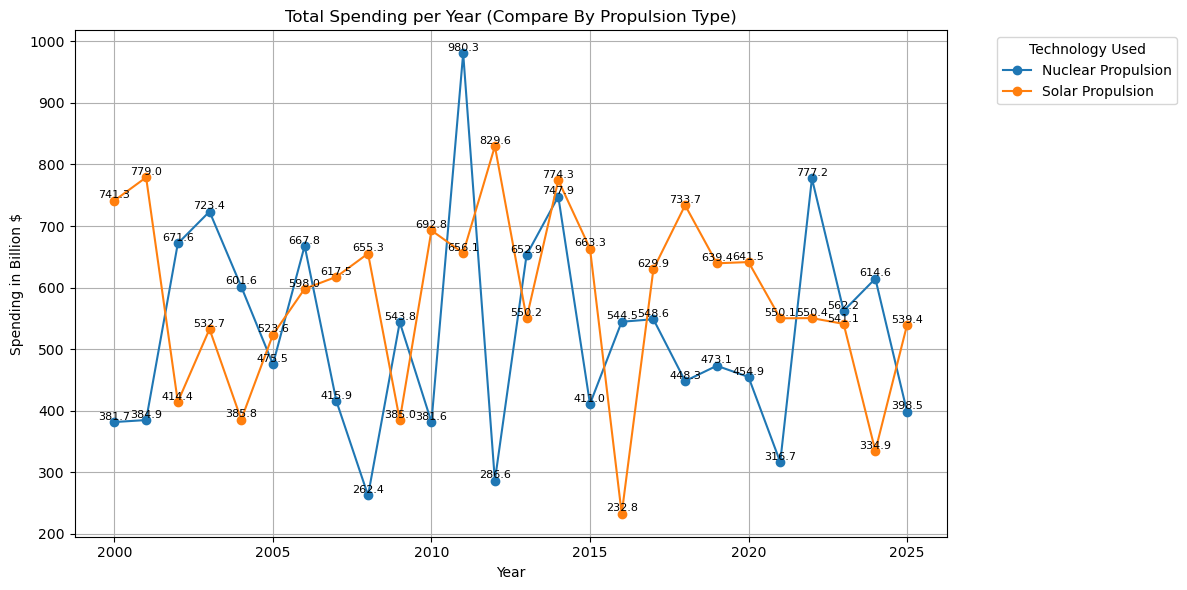

In [15]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt
import squarify

# Declaration
# Exploratory Data Analysis (EDA) - Line Chart Total Spending per Year (Compare By Propulsion Type)
data = pd.read_csv("Global_Space_Exploration_Dataset.csv", encoding="ISO-8859-1")

# Ensure Year Exists
if 'Year' not in data.columns:
    if 'Date' in data.columns:
        data['Year'] = pd.to_datetime(data['Date'], errors='coerce').dt.year
    else:
        raise ValueError("No 'Year' or 'Date' column found in the dataset")

# Filter only propulsion-based technologies
data = data[data['Technology Used'].str.contains("Propulsion", case=False, na=False)]

# Group by Technology Used & Year, sum spending
spending_per_year = (data.groupby(['Technology Used', 'Year'])['Budget (in Billion $)'].sum().reset_index().sort_values('Year'))

# Plot Line Chart
plt.figure(figsize=(12, 6))

# Plot each propulsion technology as a separate line
for tech in spending_per_year['Technology Used'].unique():
    dt = spending_per_year[spending_per_year['Technology Used'] == tech]
    plt.plot(dt['Year'], dt['Budget (in Billion $)'], marker='o', label=tech)

plt.title('Total Spending per Year (Compare By Propulsion Type)')
plt.xlabel('Year')
plt.ylabel('Spending in Billion $')
plt.grid(True)
plt.legend(title='Technology Used', bbox_to_anchor=(1.05, 1), loc='upper left')
# Add Label
for x, y, tech in zip(spending_per_year['Year'], spending_per_year['Budget (in Billion $)'], spending_per_year['Technology Used']):
    plt.text(x, y + 0.5, str(round(y, 1)), ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()